#  Sentiment Analysis on Restaurant Reviews using Naive                                         Bayes Classifier
- Project Goal:
To predict whether a restaurant review is positive or negative based on the text content using a Naive Bayes classifier.

# 1. Data Collection
- Obtain a dataset containing restaurant reviews with corresponding sentiment labels 

In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t")
df.sample(5)

,Review,Liked
185,I ordered the Lemon raspberry ice cocktail whi...,1
118,Kind of hard to mess up a steak but they did.,0
662,The owners are super friendly and the staff is...,1
355,"On the good side, the staff was genuinely plea...",1
454,The last 3 times I had lunch here has been bad.,0


In [4]:
# Display the dimensions of the DataFrame
print(df.shape)


(1000, 2)


# 2 Data Cleaning
- Remove duplicates, if any, to ensure data integrity.
- Handle missing values in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
encoder = LabelEncoder()
df['Liked']= encoder.fit_transform(df['Liked'])

In [8]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
## missing values
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
# Count the number of duplicated rows
num_duplicates = df.duplicated().sum()

# Display the total number of duplicated rows
print("Total number of duplicated rows:", num_duplicates)


Total number of duplicated rows: 4


In [11]:
df.drop_duplicates(keep ='first')
print(df.shape)

(1000, 2)


# 3 Exploratory Data Analysis
- Analyze the distribution of positive and negative reviews in the dataset.
- Explore the length of reviews to understand the typical review length.
- Visualize the most common words in positive and negative reviews using word clouds or bar charts.

In [12]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

([<matplotlib.patches.Wedge at 0x1cd3c4cc090>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

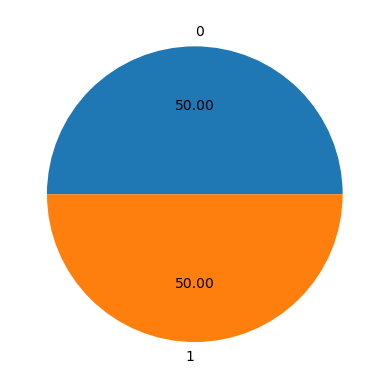

In [13]:
plt.pie(df['Liked'].value_counts(),labels = ['0','1'], autopct = "%0.2f")

In [14]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['Review'].apply(len)

In [16]:
df.head()

,Review,Liked,num_characters
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [17]:
# num of words
df['num_word']= df['Review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,Review,Liked,num_characters,num_word
0,Wow... Loved this place.,1,24,6
1,Crust is not good.,0,18,5
2,Not tasty and the texture was just nasty.,0,41,9
3,Stopped by during the late May bank holiday of...,1,87,16
4,The selection on the menu was great and so wer...,1,59,13


In [19]:
# num of sentences
df['num_sentence']= df['Review'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Review,Liked,num_characters,num_word,num_sentence
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [20]:
df[['num_characters', 'num_word' , 'num_sentence']].describe()

,num_characters,num_word,num_sentence
count,1000.000000,1000.000000,1000.000000
mean,58.315000,12.684000,1.039000
std,32.360052,6.735838,0.193692
min,11.000000,3.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,51.000000,11.000000,1.000000
75%,80.000000,17.000000,1.000000
max,149.000000,34.000000,2.000000


In [21]:
# Liked
df[df['Liked']== 1][['num_characters', 'num_word' , 'num_sentence']].describe()

,num_characters,num_word,num_sentence
count,500.000000,500.000000,500.00000
mean,55.880000,12.042000,1.04800
std,30.219464,6.282609,0.21398
min,11.000000,3.000000,1.00000
25%,32.750000,7.000000,1.00000
50%,49.500000,11.000000,1.00000
75%,73.250000,16.000000,1.00000
max,148.000000,33.000000,2.00000


In [22]:
# Not Liked
df[df['Liked']== 0][['num_characters', 'num_word' , 'num_sentence']].describe()

,num_characters,num_word,num_sentence
count,500.000000,500.000000,500.000000
mean,60.750000,13.326000,1.030000
std,34.224935,7.108924,0.170758
min,11.000000,3.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.500000,12.000000,1.000000
75%,84.000000,18.000000,1.000000
max,149.000000,34.000000,2.000000


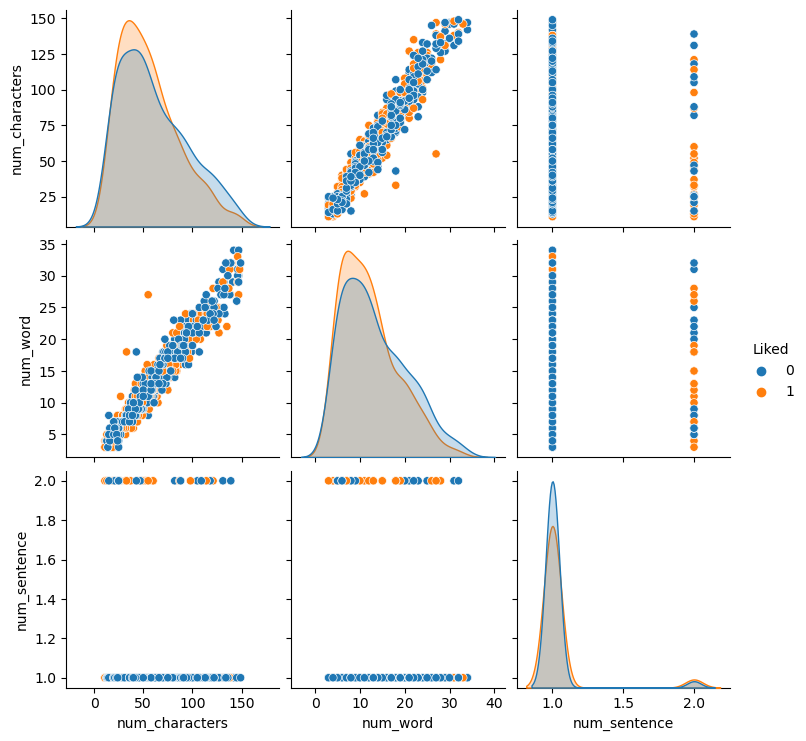

In [23]:
sns.pairplot(df,hue='Liked')

In [24]:
df.corr()

C:\Users\vaish\AppData\Local\Temp\ipykernel_13192\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Liked,num_characters,num_word,num_sentence
Liked,1.000000,-0.075285,-0.095359,0.046489
num_characters,-0.075285,1.000000,0.970841,-0.025119
num_word,-0.095359,0.970841,1.000000,0.027869
num_sentence,0.046489,-0.025119,0.027869,1.000000


C:\Users\vaish\AppData\Local\Temp\ipykernel_13192\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

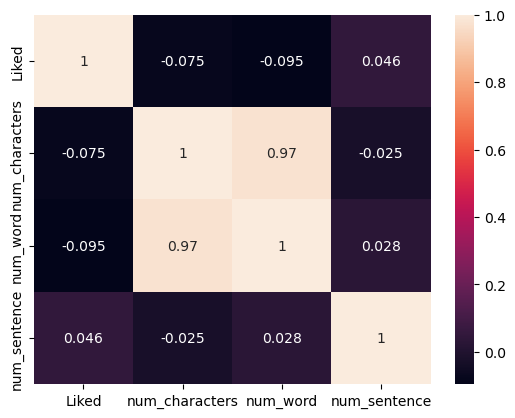

In [25]:
sns.heatmap(df.corr(), annot = True)

# 4 Data Preprocessing
- Tokenize the cleaned text (split into words).
- Apply stemming or lemmatization to reduce words to their base form.
- Remove special characters, numbers, and punctuation marks from the text.
- Convert text to lowercase to ensure uniformity.
- Remove stopwords (commonly used words like 'and', 'the', 'is') that do not contribute to the sentiment analysis.

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and PorterStemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Define a function to transform text
def transform_text(Review):
    # Convert text to lowercase
    Review = Review.lower()
    # Tokenize the text into words
    Review = nltk.word_tokenize(Review)
    y = []
    
    # Filter out non-alphanumeric tokens
    for i in Review:
        if i.isalnum():
            y.append(i)
    # Create a copy of the tokenized text
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation, and perform stemming
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(ps.stem(i))
    
    # Join the stemmed words back into a single string
    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df['transformed_text'] = df['Review'].apply(transform_text)

In [28]:
df.head()

,Review,Liked,num_characters,num_word,num_sentence,transformed_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


Feature Extraction:

Use techniques like Bag of Words (BoW) or TF-IDF to convert text data into numerical features.
Create a matrix where rows represent reviews and columns represent unique words (features).
Split Dataset:

Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
Model Training:

Use the training dataset to train a Naive Bayes classifier.
Naive Bayes assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
Model Evaluation:

Evaluate the model using the testing dataset.
Use metrics such as accuracy, precision, recall, and F1-score to assess performance.
Prediction:

Apply the trained model to new restaurant reviews to predict their sentiment.
Improvements:

Experiment with different preprocessing techniques and feature extraction methods to improve model performance.
Use cross-validation for more robust model evaluation.
Deployment:

Deploy the trained model to predict sentiments of new restaurant reviews in real-time.
Conclusion:

Summarize the project, discussing the effectiveness of the Naive Bayes classifier for sentiment analysis on restaurant reviews.
Discuss potential further improvements or extensions to the project.

In [29]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color= 'white')

In [30]:
not_liked = wc.generate(df[df['Liked']== 0]['transformed_text'].str.cat(sep = " "))

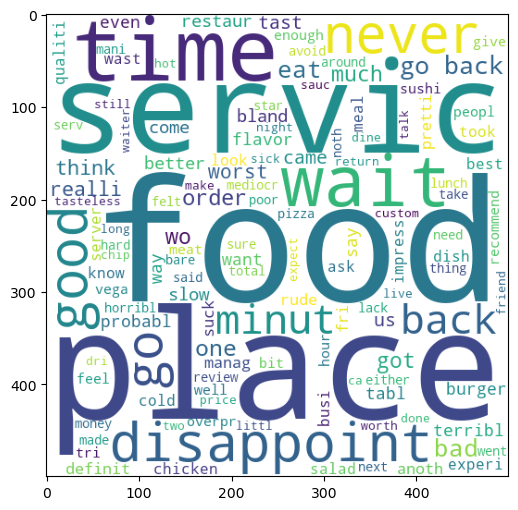

In [31]:
plt.figure(figsize = (12,6))
plt.imshow(not_liked)

In [32]:
liked = wc.generate(df[df['Liked']== 1]['transformed_text'].str.cat(sep = " "))

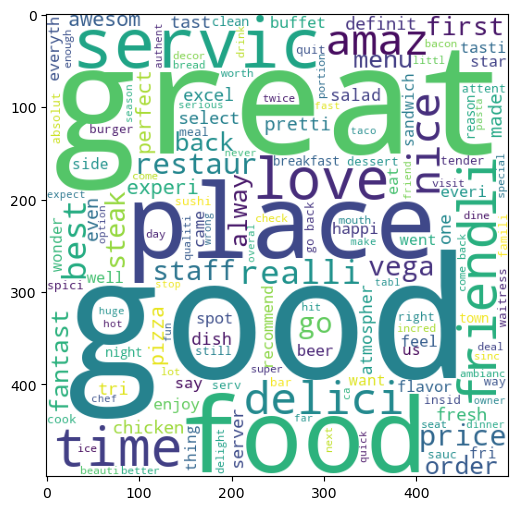

In [33]:
plt.figure(figsize = (12,6))
plt.imshow(liked)

In [34]:
liked_corpus = []
for msg in df[df['Liked']== 1]['transformed_text'].tolist():
    for word in msg.split():
        liked_corpus.append(word)
    

In [35]:
len(liked_corpus)

2680

In [36]:
from collections import Counter
Counter(liked_corpus).most_common(30)

[('good', 73),
 ('great', 70),
 ('place', 60),
 ('food', 60),
 ('servic', 46),
 ('love', 30),
 ('time', 26),
 ('friendli', 24),
 ('delici', 24),
 ('back', 23),
 ('amaz', 22),
 ('go', 22),
 ('nice', 22),
 ('realli', 22),
 ('best', 22),
 ('like', 20),
 ('also', 18),
 ('restaur', 17),
 ('price', 16),
 ('staff', 15),
 ('vega', 15),
 ('steak', 14),
 ('first', 13),
 ('menu', 12),
 ('order', 12),
 ('alway', 12),
 ('fantast', 12),
 ('experi', 12),
 ('pizza', 12),
 ('perfect', 12)]

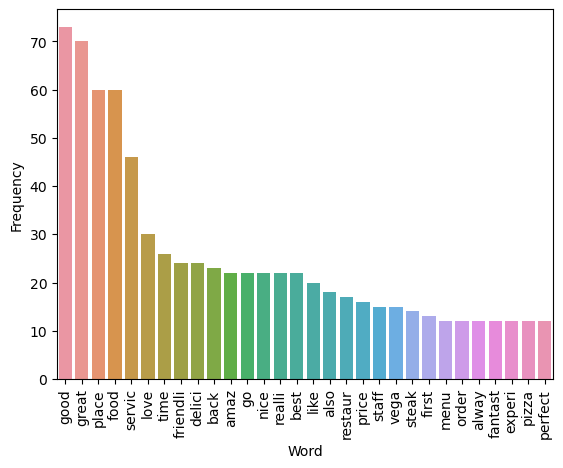

In [37]:
# Assuming liked_corpus is a list of strings
liked_counter = Counter(liked_corpus)
top_30_words = dict(liked_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()


In [38]:
not_liked_corpus = []
for msg in df[df['Liked']== 0]['transformed_text'].tolist():
    for word in msg.split():
        not_liked_corpus.append(word)

In [39]:
len(not_liked_corpus)

2838

In [40]:
from collections import Counter
Counter(not_liked_corpus).most_common(30)

[('food', 66),
 ('place', 52),
 ('go', 39),
 ('back', 38),
 ('servic', 38),
 ('like', 31),
 ('time', 29),
 ('wait', 26),
 ('would', 25),
 ('disappoint', 23),
 ('good', 22),
 ('never', 22),
 ('ever', 19),
 ('minut', 19),
 ('get', 18),
 ('eat', 18),
 ('bad', 18),
 ('one', 17),
 ('order', 16),
 ('much', 15),
 ('got', 15),
 ('wo', 15),
 ('think', 14),
 ('realli', 14),
 ('worst', 13),
 ('tast', 12),
 ('came', 12),
 ('us', 12),
 ('slow', 11),
 ('restaur', 11)]

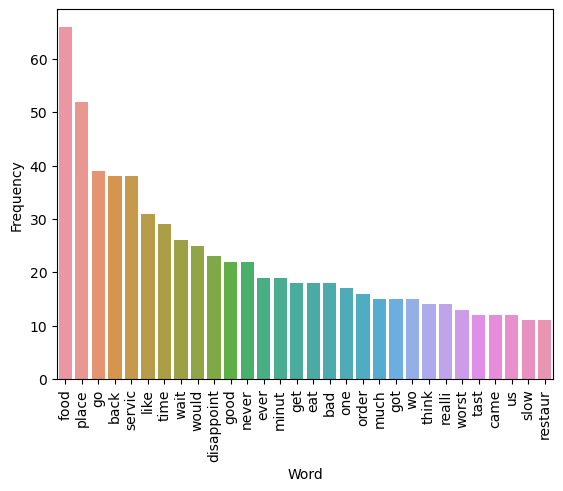

In [41]:
# Assuming not_liked_corpus is a list of strings
not_liked_counter = Counter(not_liked_corpus)
top_30_words = dict(not_liked_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()


# 5 Model Building
- Use the training dataset to train a Naive Bayes classifier. Naive Bayes assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 
- Evaluate the model using the testing dataset. Use metrics such as accuracy, precision, recall, and F1-score to assess performance.


In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle
import pandas as pd

# Assuming `df` is your DataFrame with 'transformed_text' column

# Fit the CountVectorizer or TfidfVectorizer on your text data
vectorizer = CountVectorizer()  # or TfidfVectorizer()
x = vectorizer.fit_transform(df['transformed_text'])

# Save the fitted vectorizer as vectorizer.pkl
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [43]:
print(x.shape)


(1000, 1558)


In [44]:
y = df['Liked'].values

In [45]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


In [49]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
gnb.fit(x_train.toarray(), y_train)  # Convert x_train to a dense numpy array
y_pred1 = gnb.predict(x_test.toarray())  # Convert x_test to a dense numpy array
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.725
[[62 46]
 [ 9 83]]
0.6434108527131783


In [51]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.825
[[84 24]
 [11 81]]
0.7714285714285715


In [52]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.805
[[79 29]
 [10 82]]
0.7387387387387387


In [53]:
import pickle
pickle.dump(bnb,open('bnb.pkl','wb'))


In [54]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))